<a href="https://colab.research.google.com/github/pleshro/GlassesGAN_release/blob/main/Glasses_Try_on_App_demo_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initalization tasks

In [1]:
import os
from getpass import getpass
import urllib
import shutil
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from base64 import b64decode

In [2]:
def plot_images_subplot(images, #list of images or image paths
                        plots_tall_wide=None, #tuple with number of subplots tall and wide
                        sub_titles=None, 
                        figsize = (8,10), #(width, tall)
                        dpi = 500,
                        sharex = 'all',
                        sharey = 'all',
                        title='Image Subplots',
                        remove_ticks=False,
                        save_path_name = None,
                        fill_images_columnwise=False,
                        max_images_limit=100,
                        subplot_title_text_size=10,
                        use_tight_padding=False,
                        use_col_row_names=False,
                        col_names=None,
                        row_names=None,
                        col_name_font_weight=None,
                        col_name_font_size=None,
                        row_name_font_weight=None,
                        row_name_font_size=None):
  
    if len(images) > max_images_limit:
        raise Exception(f'Danger: too many images, {len(images)} > {max_images_limit}, stopping')
    if type(images[0]) == str:
        images = [plt.imread(fp) for fp in images]
        
    if len(images[0].shape) == 2:
        cmap='gray'
    else:
        cmap=None
        
        
    if not plots_tall_wide:
        plots_tall = int(np.ceil(np.sqrt(len(images))))
        plots_wide = plots_tall
    else:
        plots_tall, plots_wide = plots_tall_wide
        
    if not sub_titles:
        if use_col_row_names:
          sub_titles = ['' for i in range(len(images))]
        else:
          sub_titles = [f'{i}' for i in range(len(images))]
        
    if fill_images_columnwise:
      #Reorientent images to fill column first
      a = np.arange(len(images))
      a = a.reshape((plots_tall, plots_wide), order='f')
      new_ordering = [a.flatten()[i] for i in range(a.size)]
      images = [images[i] for i in new_ordering]
      sub_titles = [sub_titles[i] for i in new_ordering]


    fig, axs = plt.subplots(plots_tall, 
                            plots_wide, 
                            sharex=sharex, 
                            sharey=sharey, 
                            dpi=dpi, 
                            figsize = figsize,
                            frameon=True)

    fig.suptitle(title)
    
    if plots_tall == 1:
        plot_locs = [ j for j in range(plots_wide) ]
    elif plots_wide == 1:
        plot_locs = [ i for i in range(plots_tall) ]
    else:
        plot_locs = [(i,j) for i in range(plots_tall) for j in range(plots_wide)]
    
    for i, im in enumerate(images):
        plt.axes(axs[plot_locs[i]])
        plt.imshow(im,cmap=cmap)
        plt.title(sub_titles[i], fontsize=subplot_title_text_size)
        if remove_ticks:
            plt.gca().axes.get_xaxis().set_ticks([])
            plt.gca().axes.get_yaxis().set_ticks([])
            
    if use_col_row_names:
      if col_name_font_weight is None:
        col_name_font_weight = rcParams['axes.titleweight']
      if col_name_font_size is None:
        col_name_font_size = rcParams['axes.titlesize']
      for ax, col in zip(axs[0,:], col_names):
          ax.set_title(col,
                       fontdict={'fontsize': col_name_font_size,
                                 'fontweight': col_name_font_weight},
                       loc='center', 
                       pad=6.0) #offset from top of axis
          
      if row_name_font_weight is None:
        row_name_font_weight = rcParams['axes.titleweight']
      if row_name_font_size is None:
        row_name_font_size = rcParams['axes.titlesize']
      for ax, row in zip(axs[:,0], row_names):
          ax.set_ylabel(row, 
                        rotation=90, 
                        fontdict={'fontsize': col_name_font_size,
                                 'fontweight': col_name_font_weight})
                        # size='large')

    if use_tight_padding:
        plt.tight_layout(pad=0.01, h_pad=None, w_pad=None, rect=None)
        
    if save_path_name is None:
        plt.show()
    else:
        plt.savefig(save_path_name)
    
    return

In [3]:
base_working_dir = r'C:\Users\34568\Desktop\GlassesGAN'
repo_name_dir = 'GlassesGAN_release'
msvc_path = r"C:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools\VC\Tools\MSVC\14.29.30133\bin\Hostx64\x64"
os.environ["PATH"] = msvc_path + ";" + os.environ.get("PATH", "")
### Load glasses_vton_inference class
os.chdir(f'{base_working_dir}/{repo_name_dir}')
from glasses_vton_inference import glasses_vton_inference
os.chdir(f'{base_working_dir}/{repo_name_dir}')

### Choose Tinted or Clear Glasses

In [4]:
glasses_option = 'RG'
outer_dilation_factor=5
outer_blur_factor=25//2
inner_blur_factor=5
ideal_avg_glasses_frame_area = 0.020 #0.018 #0.022
chosen_deeplab_epoch = 19 

load_loc = base_working_dir

use_full_glasses_or_frames_mask = 'frames' if glasses_option == 'RG' else 'full_glasses'

fitted_pca_fp = f'{load_loc}/fitted_pca_celebhq_dataset_results.joblib'

ave_add_glasses_diff_fp = f'{load_loc}/aveglassesdiff_celebhq_dataset_results_{glasses_option}.npy'
resume_model_ckpt = f'{load_loc}/deeplab_epoch_{chosen_deeplab_epoch}.pth'

gvton = glasses_vton_inference(
                     fitted_pca_fp = fitted_pca_fp, 
                     ave_add_glasses_diff_fp = ave_add_glasses_diff_fp,
                     base_working_dir = base_working_dir,
                     temp_save_folder = f'{base_working_dir}/tempfolder',
                     resume_model_ckpt = resume_model_ckpt,
                     deeplab_script_location = (f'{base_working_dir}/{repo_name_dir}/'
                                                'datasetGAN_release/datasetGAN'),
                     chosen_deeplab_epoch=chosen_deeplab_epoch,
                     load_loc=load_loc,
                     use_full_glasses_or_frames_mask=use_full_glasses_or_frames_mask,
                     run_tests=False,
                     outer_dilation_factor=outer_dilation_factor,
                     outer_blur_factor=outer_blur_factor,
                     inner_blur_factor=inner_blur_factor,
                     ideal_avg_glasses_frame_area=ideal_avg_glasses_frame_area,
                     auto_clean=True)

Loading e4e over the pSp framework from checkpoint: pretrained_models/e4e_ffhq_encode.pt
Model successfully loaded!
Model checkpoint: C:\Users\34568\Desktop\GlassesGAN/deeplab_epoch_19.pth (valid)
DeepLab script: C:\Users\34568\Desktop\GlassesGAN/GlassesGAN_release/datasetGAN_release/datasetGAN\test_deeplab_cross_validation.py (valid)

Removing temporary folder

Copying model to temporary working directory


#Inference

Choose picture source for editing. "Uploaded File" uses the image stored at '/content/photo.jpg', while WebCam activiates the camera on the device to take a picture. 

In [5]:
image_path = f'{base_working_dir}/{repo_name_dir}/imgtest/01.jpg'
plt.figure()
plt.imshow(plt.imread(image_path))


input_image, result_image, base_latent = gvton.embed_input_image(image_path, 
                                                                show_plots=False)

start_latent, edit_image, _ = gvton.add_avg_glasses(input_image=input_image, 
                                        base_latent=base_latent,
                                        base_bias=1,
                                        show_plots=False,
                                        auto_pick_bias=True,
                                        return_blended_image=True)

Aligned image has shape: (1024, 1024)
Inference took 0.6128 seconds.

Saving image and fake groundtruth maps to temporary file location


0it [00:00, ?it/s]

Resizing image to (512,512,3)


1it [00:00,  1.76it/s]

Resizing image to (512,512,3)


2it [00:01,  1.96it/s]

Resizing image to (512,512,3)


3it [00:01,  2.00it/s]

Resizing image to (512,512,3)


4it [00:02,  2.03it/s]

Resizing image to (512,512,3)


5it [00:02,  2.04it/s]

Resizing image to (512,512,3)


6it [00:03,  2.01it/s]

Resizing image to (512,512,3)


7it [00:03,  2.04it/s]

Resizing image to (512,512,3)


8it [00:03,  2.02it/s]

Resizing image to (512,512,3)


9it [00:04,  1.99it/s]

Resizing image to (512,512,3)


10it [00:04,  2.01it/s]

Resizing image to (512,512,3)


11it [00:05,  2.02it/s]

Resizing image to (512,512,3)


12it [00:05,  2.04it/s]

Resizing image to (512,512,3)


13it [00:06,  2.04it/s]

Resizing image to (512,512,3)


14it [00:06,  2.05it/s]

Resizing image to (512,512,3)


15it [00:07,  2.03it/s]

Resizing image to (512,512,3)


16it [00:07,  2.07it/s]

Resizing image to (512,512,3)


17it [00:08,  2.08it/s]

Resizing image to (512,512,3)


18it [00:08,  2.09it/s]

Resizing image to (512,512,3)


19it [00:09,  2.01it/s]

Resizing image to (512,512,3)


20it [00:09,  2.03it/s]



Running deeplab
Opt {'exp_dir': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', 'batch_size': 64, 'category': 'face', 'debug': False, 'dim': [512, 512, 5088], 'deeplab_res': 512, 'number_class': 4, 'testing_data_number_class': 4, 'max_training': 7, 'stylegan_ver': '1', 'annotation_data_from_w': False, 'annotation_mask_path': './custom_data/annotation/training_data', 'testing_path': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/input_images', 'average_latent': './custom_data/training_latent/avg_latent_stylegan1.npy', 'annotation_image_latent_path': './custom_data/training_latent/latent_stylegan1.npy', 'stylegan_checkpoint': './checkpoints/stylegan_pretrain/karras2019stylegan-ffhq-1024x1024_old_serialization.pt', 'model_num': 10, 'upsample_mode': 'bilinear'}
args Namespace(exp='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/face_34.json', resume='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', cross_validate=False, validation_number=0, chosen_deeplab_epoch=19)
R

0it [00:00, ?it/s]

Resizing image to (512,512,3)


1it [00:00,  2.19it/s]



Running deeplab
Opt {'exp_dir': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', 'batch_size': 64, 'category': 'face', 'debug': False, 'dim': [512, 512, 5088], 'deeplab_res': 512, 'number_class': 4, 'testing_data_number_class': 4, 'max_training': 7, 'stylegan_ver': '1', 'annotation_data_from_w': False, 'annotation_mask_path': './custom_data/annotation/training_data', 'testing_path': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/input_images', 'average_latent': './custom_data/training_latent/avg_latent_stylegan1.npy', 'annotation_image_latent_path': './custom_data/training_latent/latent_stylegan1.npy', 'stylegan_checkpoint': './checkpoints/stylegan_pretrain/karras2019stylegan-ffhq-1024x1024_old_serialization.pt', 'model_num': 10, 'upsample_mode': 'bilinear'}
args Namespace(exp='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/face_34.json', resume='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', cross_validate=False, validation_number=0, chosen_deeplab_epoch=19)
R

# Glasses Personalization 
Select values and click "Run Cell" button on left on sliders


Saving image and fake groundtruth maps to temporary file location


0it [00:00, ?it/s]

Resizing image to (512,512,3)


1it [00:00,  2.03it/s]



Running deeplab
Opt {'exp_dir': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', 'batch_size': 64, 'category': 'face', 'debug': False, 'dim': [512, 512, 5088], 'deeplab_res': 512, 'number_class': 4, 'testing_data_number_class': 4, 'max_training': 7, 'stylegan_ver': '1', 'annotation_data_from_w': False, 'annotation_mask_path': './custom_data/annotation/training_data', 'testing_path': 'C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/input_images', 'average_latent': './custom_data/training_latent/avg_latent_stylegan1.npy', 'annotation_image_latent_path': './custom_data/training_latent/latent_stylegan1.npy', 'stylegan_checkpoint': './checkpoints/stylegan_pretrain/karras2019stylegan-ffhq-1024x1024_old_serialization.pt', 'model_num': 10, 'upsample_mode': 'bilinear'}
args Namespace(exp='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/face_34.json', resume='C:\\Users\\34568\\Desktop\\GlassesGAN/tempfolder/model', cross_validate=False, validation_number=0, chosen_deeplab_epoch=19)
R

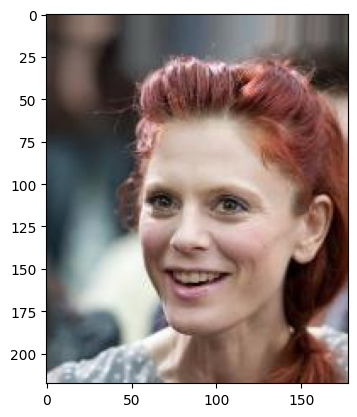

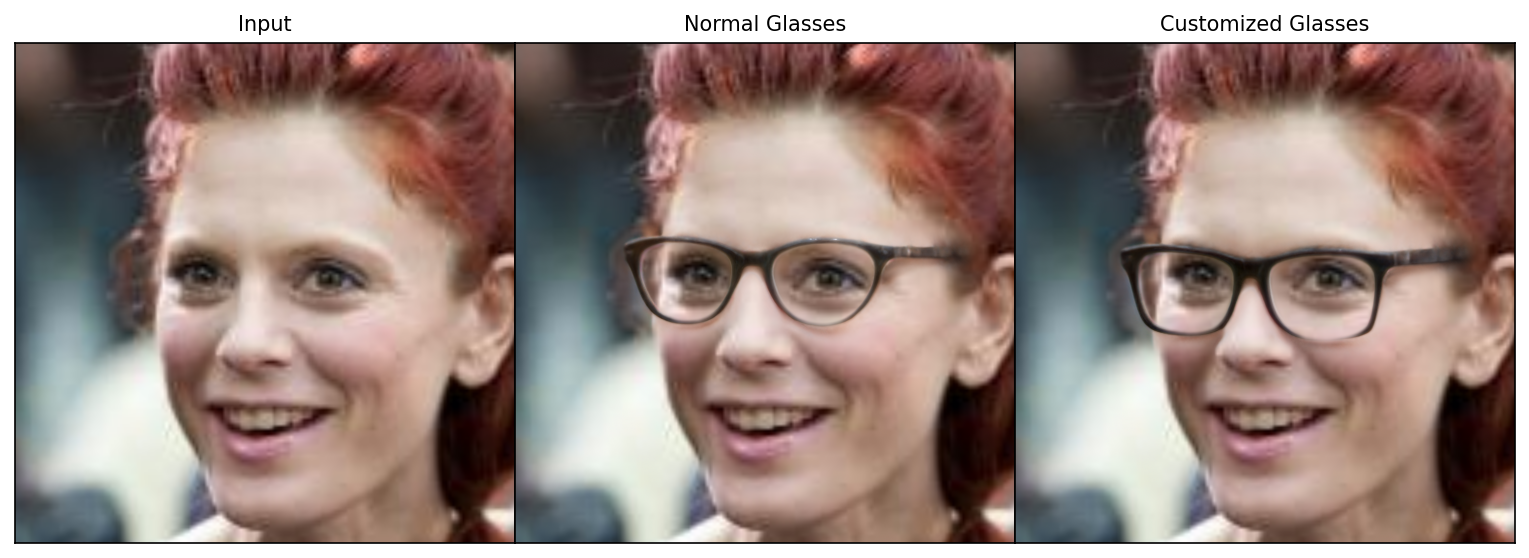

In [6]:
#@title { display-mode: "form"}

%matplotlib inline

Size = 5 #@param {type:"slider", min:-5.0, max:10.0, step:0.5}
Height = -9 #@param {type:"slider", min:-10.0, max:4.0, step:0.5}
Squareness = 8 #@param {type:"slider", min:-4.0, max:20.0, step:0.5}
Round_Shrink = 0 #@param {type:"slider", min:-20.0, max:20.0, step:0.5}
Cateye = 1.5 #@param {type:"slider", min:-15.0, max:20.0, step:0.5}
Thicken = 6.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}

Size = -Size
Height = -Height
Cateye = -Cateye

num_pcs = 6
latent = start_latent.copy()
for PC_num, PC_bias in enumerate((Size, Height, Squareness, Round_Shrink, Cateye, Thicken)):
  run_gen = True if PC_num == (num_pcs-1) else False
  img, latent = gvton.e4e.run_gen_add_pc_direction_bias(start_latent = latent, 
                                                fitted_pca = gvton.fitted_pca, 
                                                bias = PC_bias, 
                                                PC_num = PC_num,
                                                run_gen = run_gen) 
  
blends, _, _ = gvton.blend_in_edits(edits=[img], input_image=input_image)

plot_images_subplot(images = [np.array(input_image), edit_image, blends[0]], #list of images or image paths
                    plots_tall_wide=(1,3), #tuple with number of subplots tall and wide
                    sub_titles=('Input', 'Normal Glasses', 'Customized Glasses'), 
                    figsize = (10,4), #(width, tall)
                    dpi = 150,
                    sharex = 'all',
                    sharey = 'all',
                    title='',
                    remove_ticks=True,
                    save_path_name = None,
                    fill_images_columnwise=False,
                    max_images_limit=100,
                    subplot_title_text_size=10,
                    use_tight_padding=True,
                    use_col_row_names=False,
                    col_names=None,
                    row_names=None,
                    col_name_font_weight=None,
                    col_name_font_size=None,
                    row_name_font_weight=None,
                    row_name_font_size=None)
